In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.pyplot as plt

### read *.CSV data file
fLoc = "../Data/" 

fName1 = "log_1.csv" #11
fName2 = "log_2.csv" #10
fName3 = "log_3.csv" #9
fName4 = "log_4.csv" #9
fName5 = "log_5.csv" #9

Sum = []
SumElem = 0
um = 0.090

def LogNumber(fName, maxpoint, brown_element):
    
    global SumElem
    SumElem = len(brown_element)
    
    fLoc = "../Data/" 
    df1 = pd.read_csv(fLoc + fName, dtype=float)
    
    df2 = df1.loc[0:(maxpoint+1)*1490-1, 'X']
    dataX = df2.to_numpy() * um
    
    df3 = df1.loc[0:(maxpoint+1)*1490-1, 'Y']
    dataY = df3.to_numpy() * um


    X = [[0],[0],[0], [0],[0],[0], [0],[0],[0], [0],[0],[0]]
    Y = [[0],[0],[0], [0],[0],[0], [0],[0],[0], [0],[0],[0]]
    
    for i in range(0,maxpoint+1):
        store=[]
        for j in range(0, 1490):
            store.append(dataX[(maxpoint+1)*j+i])
            X[i] = store

    for i in range(0,maxpoint+1):
        store=[]
        for j in range(0, 1490):
            store.append(dataY[(maxpoint+1)*j+i])
            Y[i] = store
            
    SumDistt = []
    Distt = []
    for t in range(0,1490):
        SumDistt.append(0)
        for i in range(0,len(brown_element)):
            Distit = (X[brown_element[i]][t] - X[brown_element[i]][0])**2 + (Y[brown_element[i]][t] - Y[brown_element[i]][0])**2
            SumDistt[t] += Distit
    global Sum
    Sum = SumDistt
    
    
    t = np.linspace(0,119.2,1490)
    plt.figure(figsize=(12, 8))
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    # plt.xlim(xData[xDatamin], xData[xDatamax])
    plt.grid(color = "gray", linestyle="--")
    plt.xlabel('time / sec', fontsize = 20) # x axis label
    plt.ylabel('MSD / um$^2$', fontsize = 20) # y axis label

    plt.plot(t, np.array(SumDistt)/SumElem, "-", label=f"MSD of {fName}")

    plt.legend(fontsize = 20) # add legend
    plt.show( ) # show figure

    

    plt.figure(figsize=(12, 8))
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.grid(color = "gray", linestyle="--")
    plt.xlabel('x / um', fontsize = 20) # x axis label
    plt.ylabel('y / um', fontsize = 20) # y axis label

    for i in range(0,maxpoint+1):
        plt.plot(X[i], Y[i], "-", label=f"No.{i}")

    plt.legend(fontsize = 10) # add legend
    plt.show( ) # show figure
    
print(list(range(0,12)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


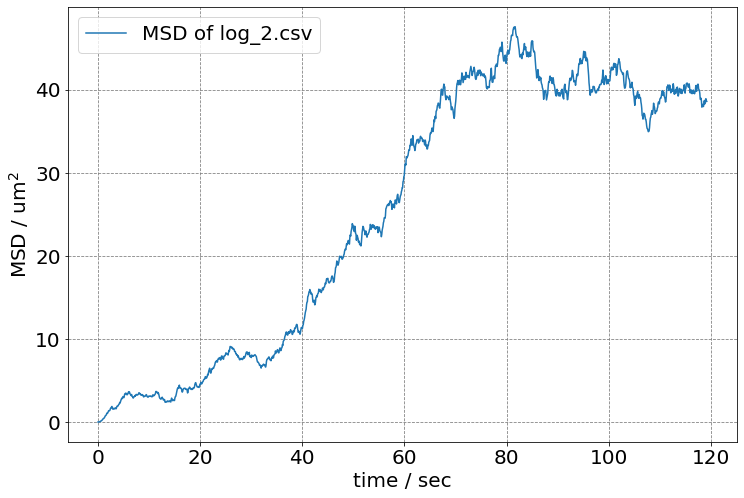

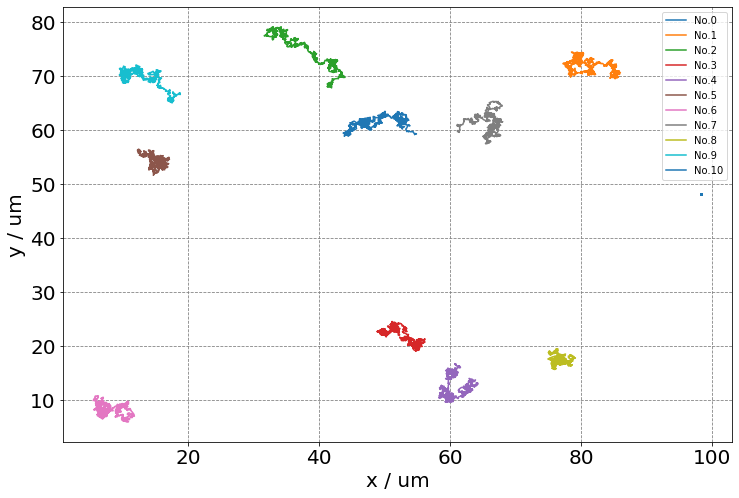

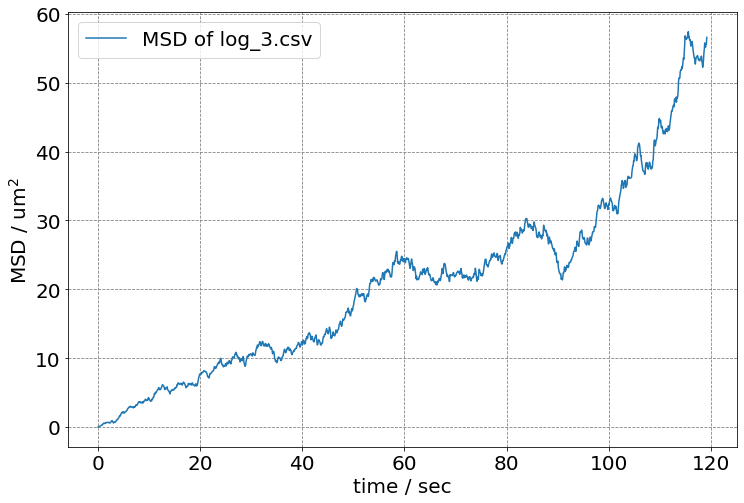

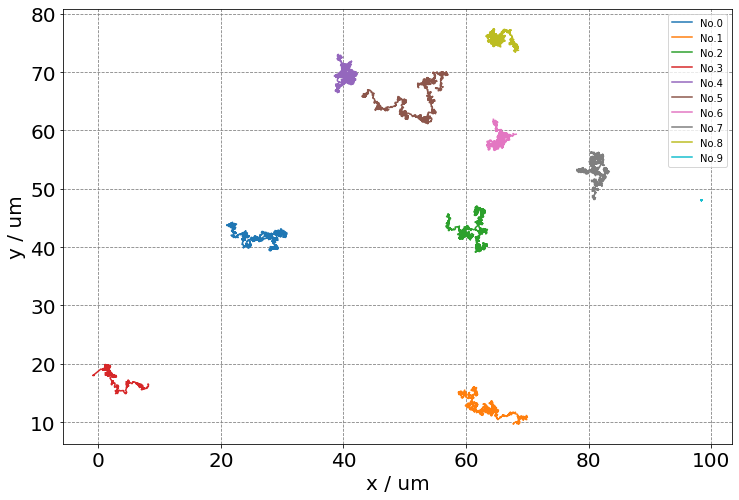

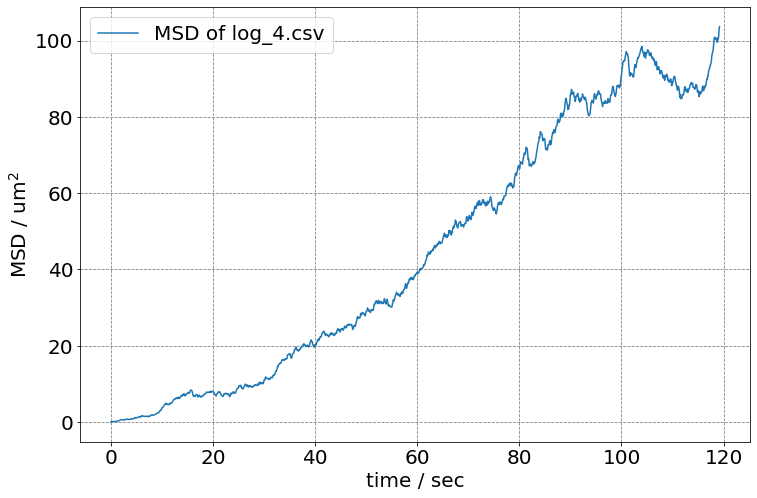

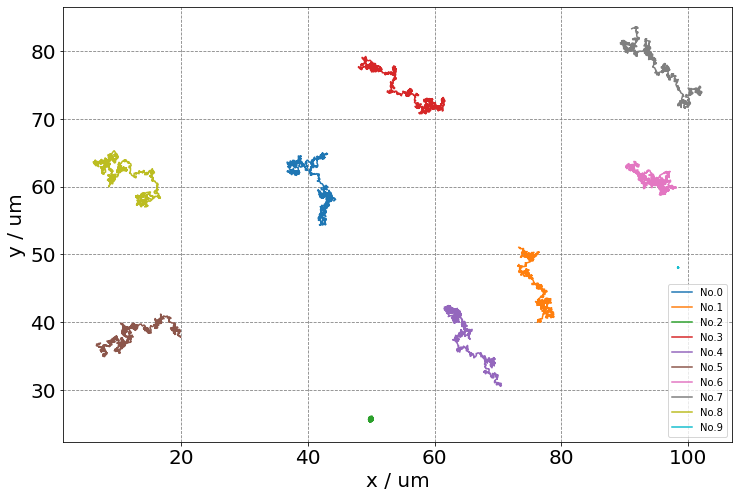

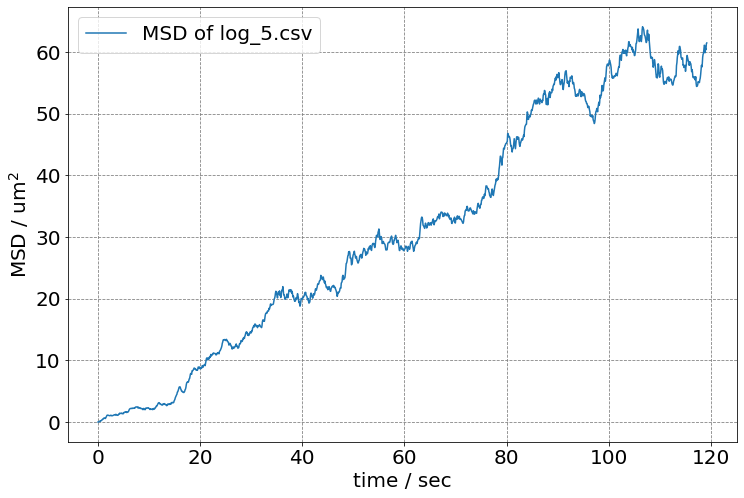

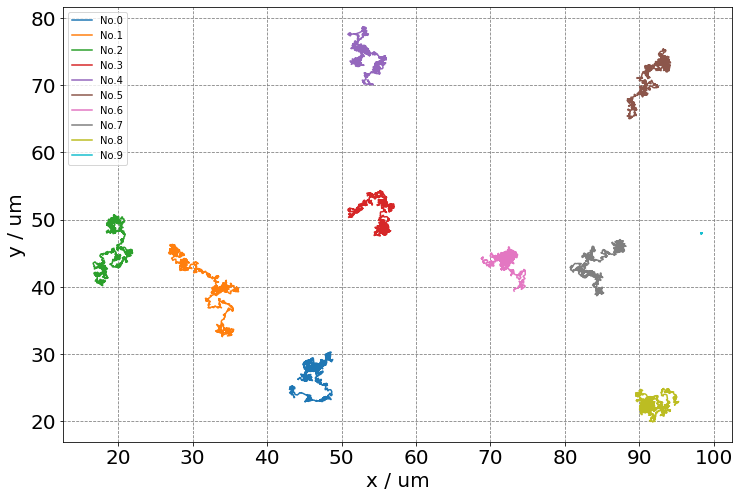

[ 0.57818034 -3.86469346] [[ 3.02354725e-06 -1.80203417e-04]
 [-1.80203417e-04  1.43249733e-02]]


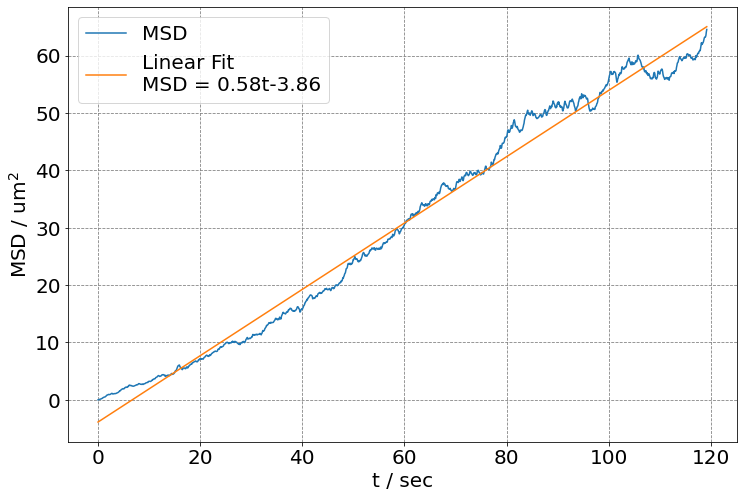

In [2]:
LogNumber(fName2, 10, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
AllDistt = np.array(Sum)
n = SumElem

LogNumber(fName3, 9, [0, 1, 2,    4, 5, 6, 7, 8])
AllDistt += np.array(Sum)
n += SumElem

LogNumber(fName4, 9, [0, 1, 2, 3, 4, 5, 6, 7, 8])
AllDistt += np.array(Sum)
n += SumElem

LogNumber(fName5, 9, [0, 1, 2, 3, 4, 5, 6, 7, 8])
AllDistt += np.array(Sum)
n += SumElem


t = np.linspace(0,119.2,1490)

def line(x, a, b):
    return a*x + b
p0 = (0.1, -0.1)
popt,pocv = curve_fit(line, t, AllDistt/n , p0)
print(popt, pocv)

plt.figure(figsize=(12, 8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(color = "gray", linestyle="--")
plt.xlabel('t / sec', fontsize = 20) # x axis label
plt.ylabel('MSD / um$^2$', fontsize = 20) # y axis label

plt.plot(t, AllDistt/n, "-", label="MSD")
plt.plot(t, popt[0]*t+popt[1], "-", label=f"Linear Fit \nMSD = {round(popt[0],2)}t{round(popt[1],2)}")

plt.legend(fontsize = 20) # add legend
plt.show( ) # show figure

In [3]:
D = popt[0]/4 * 10**(-6*2)
kb = 1.380649*10**-23
T = 273.15+20
r = 3 * 10**-6
neff = (kb*T)/(6*np.pi*D*r)
print(D*10**12,neff)

Vx=[36,35,34,34,36,36]
Vy=[36,36,36,38,37,38]
V = np.average(Vx+Vy) * 10**-6
print(V)

K = 6*np.pi*neff*r*V
print(K)

0.14454508383578776 0.000495162193412762
3.6e-05
1.00802744513629e-12


In [4]:
a = []
b = [1,4,5,6]
for i in range(0,len(b)):
    a.append(b[i])

print(a)

print(np.linspace(0,119.2,1490))

[1, 4, 5, 6]
[0.00000000e+00 8.00537273e-02 1.60107455e-01 ... 1.19039893e+02
 1.19119946e+02 1.19200000e+02]


In [5]:
1490/12.5

119.2

In [6]:
def Hist(fName, maxpoint, brown_element):
    
    global SumElem
    SumElem = len(brown_element)
    
    fLoc = "../Data/" 
    df1 = pd.read_csv(fLoc + fName, dtype=float)
    
    df2 = df1.loc[0:(maxpoint+1)*1490-1, 'X']
    dataX = df2.to_numpy() * um
    
    df3 = df1.loc[0:(maxpoint+1)*1490-1, 'Y']
    dataY = df3.to_numpy() * um


    X = [[0],[0],[0], [0],[0],[0], [0],[0],[0], [0],[0],[0]]
    Y = [[0],[0],[0], [0],[0],[0], [0],[0],[0], [0],[0],[0]]
    
    for i in range(0,maxpoint+1):
        store=[]
        for j in range(0, 1490):
            store.append(dataX[(maxpoint+1)*j+i])
            X[i] = store

    for i in range(0,maxpoint+1):
        store=[]
        for j in range(0, 1490):
            store.append(dataY[(maxpoint+1)*j+i])
            Y[i] = store

    global Xhist
    global Yhist
    Xhist = []
    Yhist = []
    for t in range(0,1490):
        for i in range(0,len(brown_element)):
            DistXit = X[brown_element[i]][t] - X[brown_element[i]][0]
            DistYit = Y[brown_element[i]][t] - Y[brown_element[i]][0]
            Xhist.append(DistXit)
            Yhist.append(DistYit)
   
    global Xtrap
    global Ytrap
    Xtrap = []
    Ytrap = []
    for t in range (0,1490):
        DistXit = X[maxpoint][t] - X[maxpoint][0]
        DistYit = Y[maxpoint][t] - Y[maxpoint][0]
        Xtrap.append(DistXit)
        Ytrap.append(DistYit)


#     plt.figure(figsize=(12, 8))
#     plt.xticks(fontsize = 20)
#     plt.yticks(fontsize = 20)
#     plt.grid(color = "gray", linestyle="--")
#     plt.xlabel('x / um', fontsize = 20) # x axis label
#     plt.ylabel('y / um', fontsize = 20) # y axis label

#     for i in range(0,maxpoint+1):
#         plt.plot(X[i], Y[i], "-", label=f"No.{i}")

#     plt.legend(fontsize = 10) # add legend
#     plt.show( ) # show figure

53640


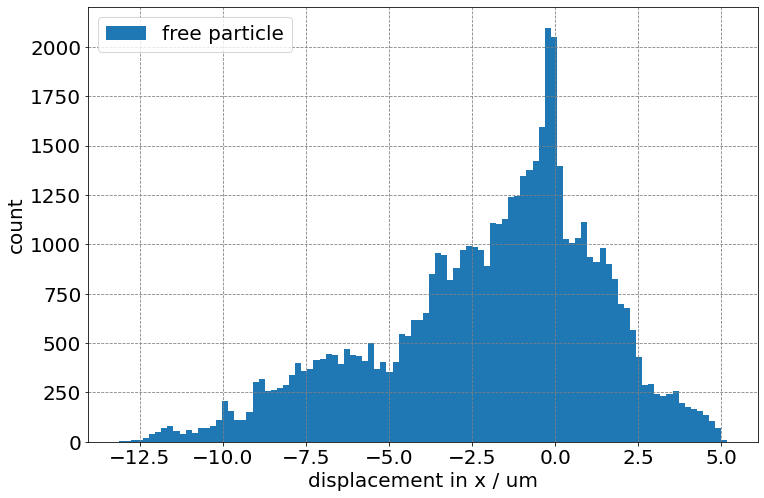

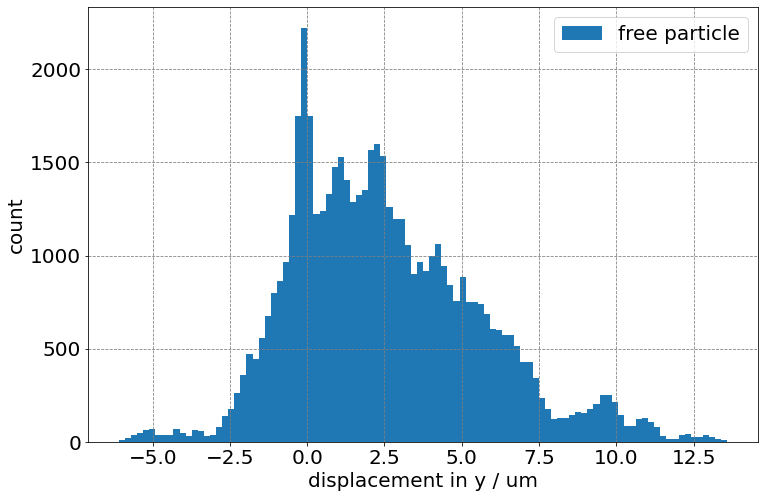

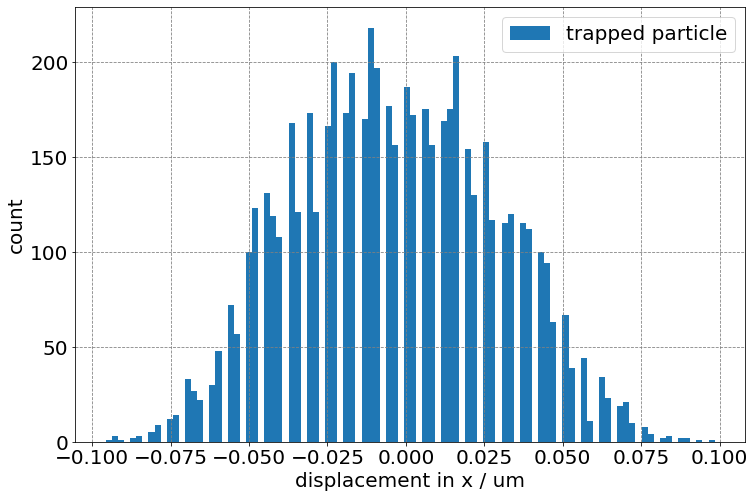

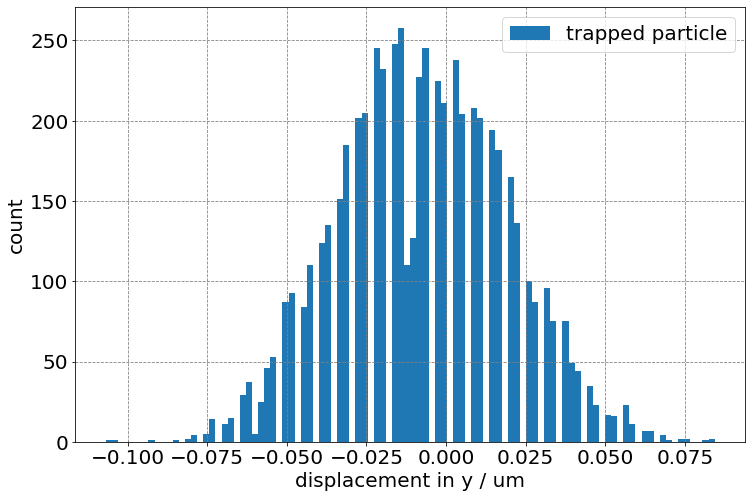

In [11]:
XhistA = []
YhistA = []
XtrapA = []
YtrapA = []

Hist(fName2, 10, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
XhistA = Xhist
YhistA = Yhist
XtrapA = Xtrap
YtrapA = Ytrap

Hist(fName3, 9, [0, 1, 2,    4, 5, 6, 7, 8])
XhistA += Xhist
YhistA += Yhist
XtrapA += Xtrap
YtrapA += Ytrap

Hist(fName4, 9, [0, 1, 2, 3, 4, 5, 6, 7, 8])
XhistA += Xhist
YhistA += Yhist
XtrapA += Xtrap
YtrapA += Ytrap

Hist(fName5, 9, [0, 1, 2, 3, 4, 5, 6, 7, 8])
XhistA += Xhist
YhistA += Yhist
XtrapA += Xtrap
YtrapA += Ytrap

print(len(XhistA))

def pic():
    plt.figure(figsize=(12, 8))
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    # plt.xlim(xData[xDatamin], xData[xDatamax])
    plt.grid(color = "gray", linestyle="--")

pic()
plt.xlabel('displacement in x / um', fontsize = 20) # x axis label
plt.ylabel('count', fontsize = 20) # y axis label
plt.hist(XhistA, bins=100, label="free particle")
plt.legend(fontsize = 20) # add legend
plt.show( ) # show figure

pic()
plt.xlabel('displacement in y / um', fontsize = 20) # x axis label
plt.ylabel('count', fontsize = 20) # y axis label
plt.hist(YhistA, bins=100, label="free particle")
plt.legend(fontsize = 20) # add legend
plt.show( ) # show figure

pic()
plt.xlabel('displacement in x / um', fontsize = 20) # x axis label
plt.ylabel('count', fontsize = 20) # y axis label
plt.hist(XtrapA, bins=100, label="trapped particle")
plt.legend(fontsize = 20) # add legend
plt.show( ) # show figure

pic()
plt.xlabel('displacement in y / um', fontsize = 20) # x axis label
plt.ylabel('count', fontsize = 20) # y axis label
plt.hist(YtrapA, bins=100, label="trapped particle")
plt.legend(fontsize = 20) # add legend
plt.show( ) # show figure